In [1]:
!pip install numpy torch torchvision matplotlib gymnasium

In [2]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
class QAgent():
    def __init__(self, learning_rate = 0.001, discount_factor = 0.9, explore_exploit_start = 1.0, explore_exploit_min = 0.01, decrement = 0.9999995, num_actions = 4, num_states = 16):
        self.q_table = {}
        #initialize q_table
        for q in range(num_states):
            self.q_table[q] = [0. for i in range(num_actions)]
        
        self.learning_rate = learning_rate # alpha
        self.discount_factor = discount_factor # gamma
        self.explore_exploit = explore_exploit_start # epsilon
        self.num_actions = num_actions
        self.explore_exploit_min = explore_exploit_min
        self.ee_decrement = decrement
        
    def choose_action(self, current_state):
        random_number = np.random.random()
        if random_number < self.explore_exploit:
            return np.random.choice([i for i in range(self.num_actions)])
        else:
            return np.argmax(self.q_table[current_state])
            #return np.random.choice(max_indexes)
            
    def decrement_explore_exploit(self):
        prev_value = self.explore_exploit
        new_value = (self.explore_exploit * self.ee_decrement) if self.explore_exploit > self.explore_exploit_min else self.explore_exploit_min
        self.explore_exploit = new_value
        #print(f"decrement_explore_exploit prev_value: {prev_value} new_value: {new_value} explore_exploit: {self.explore_exploit} ")
        
    def learn(self, current_state, action, reward, new_state):
        self.q_table[current_state][action] += self.learning_rate * (reward + self.discount_factor * np.max(self.q_table[new_state]) - self.q_table[current_state][action])
        
        self.decrement_explore_exploit()
        
    
                
        

In [4]:
agent = QAgent()
(agent.explore_exploit * agent.ee_decrement) if agent.explore_exploit > agent.explore_exploit_min else agent.explore_exploit_min

0.9999995

In [5]:
env = gym.make('FrozenLake-v1', is_slippery = True)
env.reset()

(0, {'prob': 1})

Episode: 0 Win Percent: 0.000 Epsilon: 1.00
Episode: 1000 Win Percent: 0.010 Epsilon: 1.00
Episode: 2000 Win Percent: 0.020 Epsilon: 0.99
Episode: 3000 Win Percent: 0.020 Epsilon: 0.99
Episode: 4000 Win Percent: 0.010 Epsilon: 0.98
Episode: 5000 Win Percent: 0.000 Epsilon: 0.98
Episode: 6000 Win Percent: 0.030 Epsilon: 0.98
Episode: 7000 Win Percent: 0.030 Epsilon: 0.97
Episode: 8000 Win Percent: 0.040 Epsilon: 0.97
Episode: 9000 Win Percent: 0.000 Epsilon: 0.97
Episode: 10000 Win Percent: 0.010 Epsilon: 0.96
Episode: 11000 Win Percent: 0.030 Epsilon: 0.96
Episode: 12000 Win Percent: 0.010 Epsilon: 0.95
Episode: 13000 Win Percent: 0.010 Epsilon: 0.95
Episode: 14000 Win Percent: 0.010 Epsilon: 0.95
Episode: 15000 Win Percent: 0.050 Epsilon: 0.94
Episode: 16000 Win Percent: 0.030 Epsilon: 0.94
Episode: 17000 Win Percent: 0.010 Epsilon: 0.94
Episode: 18000 Win Percent: 0.010 Epsilon: 0.93
Episode: 19000 Win Percent: 0.000 Epsilon: 0.93
Episode: 20000 Win Percent: 0.010 Epsilon: 0.93
Episo

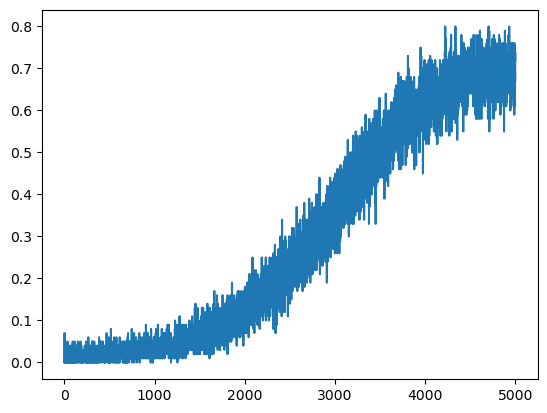

In [6]:
action = None
# 1000 Games
game_results = []
win_percentages = []
number_games = 500000

# LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3

# SFFF  0  1  2  3
# FHFH  4  5  6  7
# FFFH  8  9 10 11
# HFFG 12 13 14 15

agent = QAgent()

for i in range(number_games):
    terminated = False
    truncated = False
    observation, info = env.reset()
    score = 0
    while not terminated and not truncated:
        action = agent.choose_action(observation)
        observation_, reward, terminated, truncated, info = env.step(action)
        
        agent.learn(observation, action, reward, observation_)
        score += reward
        observation = observation_
    
    game_results.append(score)
    
    if i % 100 == 0:
        win_percentages.append(np.mean(game_results[-100:]))
        if i % 1000 == 0:
            print(f'Episode: {i} Win Percent: {win_percentages[-1]:.3f} Epsilon: {agent.explore_exploit:.2f}') 
     
print(agent.q_table)
print(f'Number: {len(game_results)} Sum: {sum(game_results)}')
plt.plot(win_percentages)
plt.show()
